<a href="https://colab.research.google.com/github/timjordanRe/Data_Wrangling_A2/blob/rahuls_branch/109_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2**

#**Data Exploration:**

Loading the required libraries and the dataset and explore its statistical properties, Distribution of the data and check for the Types of the columns.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
info = "suburb_info.xlsx"
suburb_info = pd.read_excel(info)

In [ ]:
print(suburb_info.head())

       suburb  number_of_houses  number_of_units   municipality aus_born_perc  \
0  ABBOTSFORD              2304             4706          Yarra           68%   
1  ABERFELDIE              1410              453  Moonee Valley           81%   
2   ALBANVALE              1897              138       Brimbank           46%   
3      ALBION              1389             1392       Brimbank           52%   
4  ALPHINGTON              1729             1099        Darebin           73%   

  median_income median_house_price  population  
0        $1,797         $1,299,400        4025  
1        $1,571         $1,926,600       22442  
2          $907           $594,200       54005  
3          $929           $739,100       30677  
4        $1,538         $1,729,600        9227  


In [ ]:
suburb_info.describe()

,number_of_houses,number_of_units,population
count,202.000000,202.000000,202.000000
mean,4155.767327,2480.410891,18659.311881
std,3400.864988,3132.684712,9604.187282
min,283.000000,60.000000,170.000000
25%,1973.500000,620.500000,12063.000000
50%,3256.500000,1603.000000,17583.000000
75%,5518.500000,3089.000000,24045.000000
max,23338.000000,24380.000000,54005.000000


In [ ]:
print(suburb_info.dtypes) #Checking for the Types
print(suburb_info.isnull().sum()) # Checking for the Null values from the dataset

suburb                object
number_of_houses       int64
number_of_units        int64
municipality          object
aus_born_perc         object
median_income         object
median_house_price    object
population             int64
dtype: object
suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64


In the dataset we are having some anamolies that contains $, % symbols in the aus_born_perc, median_house_price, median_income, and these are in the object datatype. so, we have to remove those anamolies and convert it into suitable datatype for any linear transformations.

In [ ]:
suburb_info['aus_born_perc'] = suburb_info['aus_born_perc'].str.replace('%', '').astype(float)
suburb_info['median_income'] = suburb_info['median_income'].str.replace('$', '').str.replace(',', '').astype(float)
suburb_info['median_house_price'] = suburb_info['median_house_price'].str.replace('$', '').str.replace(',', '').astype(float)
print(suburb_info.dtypes)

suburb                 object
number_of_houses        int64
number_of_units         int64
municipality           object
aus_born_perc         float64
median_income         float64
median_house_price    float64
population              int64
dtype: object


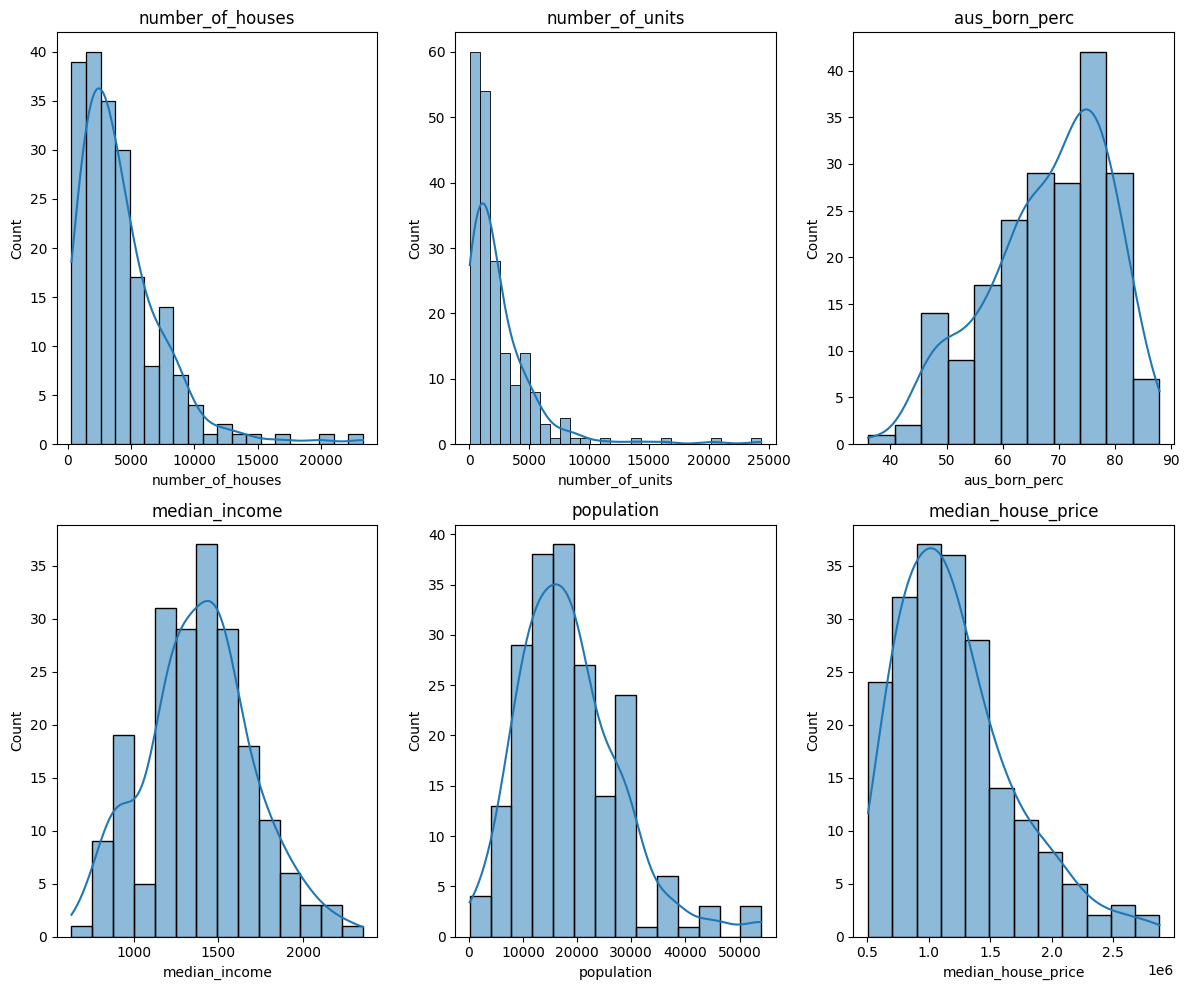

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
for i, column in enumerate(['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'population', 'median_house_price']):
    plt.subplot(2, 3, i+1)
    sns.histplot(suburb_info[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

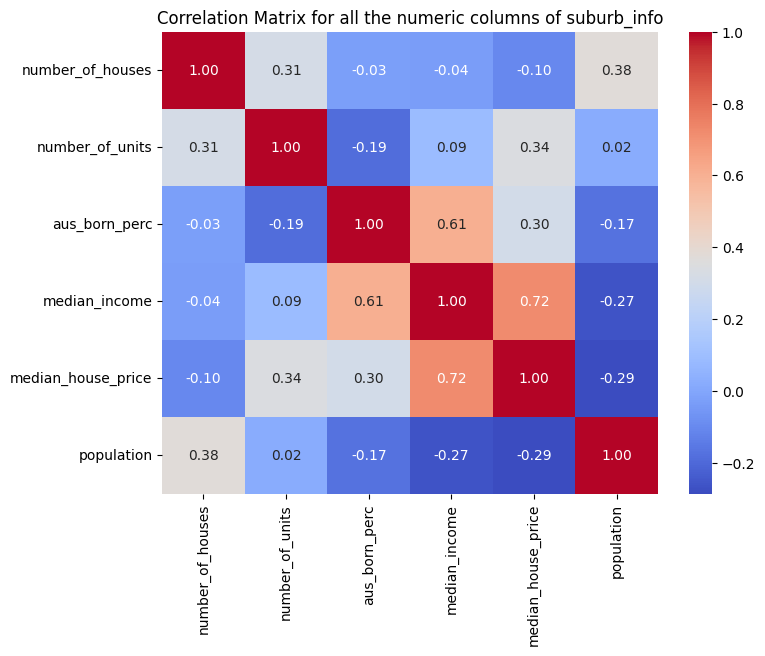

In [ ]:
# Visualization of correlation matrix

corr_matrix = suburb_info.loc[:, ~suburb_info.columns.isin(['suburb', 'municipality'])].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for all the numeric columns of suburb_info')
plt.show()

Among these features, median_income exhibits the strongest positive correlation (0.72) with median_house_price, indicating a notable tendency for higher median_house_price in areas with higher median_income. Additionally, aus_born_perc demonstrates a moderate positive correlation (0.30), implying a modest association between a higher percentage of Australian-born residents and higher median_house_price. Similarly, number_of_units and population exhibit positive correlations of 0.34 and -0.29, respectively.

# **Normalization/Transformation**

**Z-Score Standardization**

In [ ]:
suburb_info.describe()

,number_of_houses,number_of_units,aus_born_perc,median_income,median_house_price,population
count,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000
mean,4155.767327,2480.410891,68.366337,1387.935644,1.218817e+06,18659.311881
std,3400.864988,3132.684712,10.761293,317.841321,4.716807e+05,9604.187282
min,283.000000,60.000000,36.000000,633.000000,5.072000e+05,170.000000
25%,1973.500000,620.500000,62.000000,1182.250000,8.706750e+05,12063.000000
50%,3256.500000,1603.000000,70.000000,1393.000000,1.134500e+06,17583.000000
75%,5518.500000,3089.000000,77.000000,1560.000000,1.467550e+06,24045.000000
max,23338.000000,24380.000000,88.000000,2352.000000,2.875800e+06,54005.000000


While scaling may not be essential for attributes like Population, number_of_houses, and Aus_born_perc due to their inherent measures or bounded nature, applying scaling uniformly across all columns can ensure consistency and aid in model interpretation. Standardizing the data can also enhance the performance of the linear model by preventing any single feature from dominating due to its scale and maintaining relative relationships between attributes like median_income and median_house_price, despite their dollar measurement. Therefore, while not strictly necessary for all attributes, scaling promotes consistency and optimizes model performance.

In [ ]:
from sklearn import preprocessing

In [ ]:
std_scale = preprocessing.StandardScaler().fit(suburb_info[['median_income', 'median_house_price','aus_born_perc','number_of_houses',	'number_of_units','population'	]])
std = std_scale.transform(suburb_info[['median_income', 'median_house_price','aus_born_perc','number_of_houses',	'number_of_units','population']])

suburb_info['median_income_scaled'] = std[:,0]
suburb_info['median_house_price_scaled'] = std[:,1]
suburb_info['aus_born_perc_scaled'] = std[:,2]
suburb_info['number_of_houses_scaled'] = std[:,3]
suburb_info['number_of_units_scaled'] = std[:,4]
suburb_info['population_scaled'] = std[:,5]

suburb_info[0:5]

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population,median_income_scaled,median_house_price_scaled,aus_born_perc_scaled,number_of_houses_scaled,number_of_units_scaled,population_scaled
0,ABBOTSFORD,2304,4706,Yarra,68.0,1797.0,1299400.0,4025,1.290206,0.171267,-0.034127,-0.545852,0.712207,-1.527529
1,ABERFELDIE,1410,453,Moonee Valley,81.0,1571.0,1926600.0,22442,0.577392,1.504284,1.176908,-0.809379,-0.648788,0.394837
2,ALBANVALE,1897,138,Brimbank,46.0,907.0,594200.0,54005,-1.516891,-1.327527,-2.083570,-0.665824,-0.749590,3.689381
3,ALBION,1389,1392,Brimbank,52.0,929.0,739100.0,30677,-1.447502,-1.019564,-1.524631,-0.815569,-0.348300,1.254406
4,ALPHINGTON,1729,1099,Darebin,73.0,1538.0,1729600.0,9227,0.473309,1.085591,0.431656,-0.715346,-0.442063,-0.984544


On performing the Z-Score Standardization on the columns. the identified columns are standardized  

In [ ]:
print('Mean after standardisation:\median_income_scaled = {:.2f}, median_house_price_scaled = {:.2f}, aus_born_perc_scaled = {:.2f}, number_of_houses_scaled = {:.2f}, number_of_units_scaled = {:.2f}, population_scaled = {:.2f}'
      .format(suburb_info['median_income_scaled'].mean(), suburb_info['median_house_price_scaled'].mean(), suburb_info['aus_born_perc_scaled'].mean(), suburb_info['number_of_houses_scaled'].mean(), suburb_info['number_of_units_scaled'].mean(), suburb_info['population_scaled'].mean()))
print('\nStandard deviation after standardisation:\median_income_scaled = {:.2f}, median_house_price_scaled = {:.2f}, aus_born_perc_scaled = {:.2f}, number_of_houses_scaled = {:.2f}, number_of_units_scaled = {:.2f}, population_scaled = {:.2f}'
      .format(suburb_info['median_income_scaled'].std(), suburb_info['median_house_price_scaled'].std(), suburb_info['aus_born_perc_scaled'].std(), suburb_info['number_of_houses_scaled'].std(), suburb_info['number_of_units_scaled'].std(), suburb_info['population_scaled'].std()))

Mean after standardisation:\median_income_scaled = -0.00, median_house_price_scaled = -0.00, aus_born_perc_scaled = 0.00, number_of_houses_scaled = -0.00, number_of_units_scaled = -0.00, population_scaled = 0.00

Standard deviation after standardisation:\median_income_scaled = 1.00, median_house_price_scaled = 1.00, aus_born_perc_scaled = 1.00, number_of_houses_scaled = 1.00, number_of_units_scaled = 1.00, population_scaled = 1.00


(<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >)

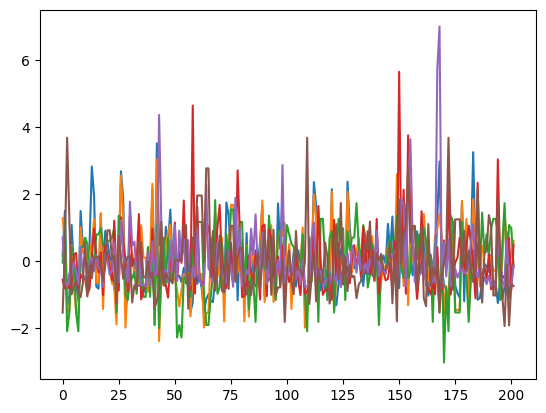

In [ ]:
%matplotlib inline
suburb_info['median_house_price_scaled'].plot(),suburb_info['median_income_scaled'].plot(),suburb_info['aus_born_perc_scaled'].plot(),suburb_info['number_of_houses_scaled'].plot(),suburb_info['number_of_units_scaled'].plot(),suburb_info['population_scaled'].plot()

**Min Max Standardization**

Studying the affect of Min max Standardization methods by making the values of Minimum to 0 and Maximum to 1. Here we are using median_house_price, median_income and aus_born_perc columns for reshaping.

In [ ]:
suburb_minmax = preprocessing.MinMaxScaler().fit(suburb_info[['median_house_price','median_income','aus_born_perc','number_of_houses',	'number_of_units','population']])
data_minmax = suburb_minmax.transform(suburb_info[['median_house_price','median_income','aus_born_perc','number_of_houses',	'number_of_units','population']])
suburb_info['median_income_minmax'] = data_minmax[:,1]
suburb_info['median_house_price_minmax'] = data_minmax[:,0]
suburb_info['aus_born_perc_minmax'] = data_minmax[:,2]
suburb_info['number_of_houses_minmax'] = data_minmax[:,3]
suburb_info['number_of_units_minmax'] = data_minmax[:,4]
suburb_info['population_minmax'] = data_minmax[:,5]
data_minmax[0:5]

array([[0.33445917, 0.67713787, 0.61538462, 0.08765994, 0.19103618,
        0.07160769],
       [0.59925695, 0.54566608, 0.86538462, 0.04888311, 0.01615954,
        0.41370855],
       [0.03673056, 0.159395  , 0.19230769, 0.07000651, 0.00320724,
        1.        ],
       [0.09790594, 0.17219314, 0.30769231, 0.04797224, 0.05476974,
        0.56667595],
       [0.51608545, 0.52646888, 0.71153846, 0.06271958, 0.04272204,
        0.16823628]])

As we can clearly see the below section for the result of min max Standardization, the columns that we have choosen is normalized to minimum value to 0 and maximum value to 1.

In [ ]:
print('Min-value after min-max scaling:\median_house_price = {:.2f}, median_income = {:.2f}, aus_born_perc = {:.2f}'
      .format(data_minmax[:,0].min(), data_minmax[:,1].min(), data_minmax[:,2].min()))
print('\nMax-value after min-max scaling:\median_house_price = {:.2f}, median_income = {:.2f}, aus_born_perc = {:.2f}'
      .format(data_minmax[:,0].max(), data_minmax[:,1].max(), data_minmax[:,2].max()))

Min-value after min-max scaling:\median_house_price = 0.00, median_income = 0.00, aus_born_perc = 0.00

Max-value after min-max scaling:\median_house_price = 1.00, median_income = 1.00, aus_born_perc = 1.00


Comparing Z-score and MinMax Standardization  

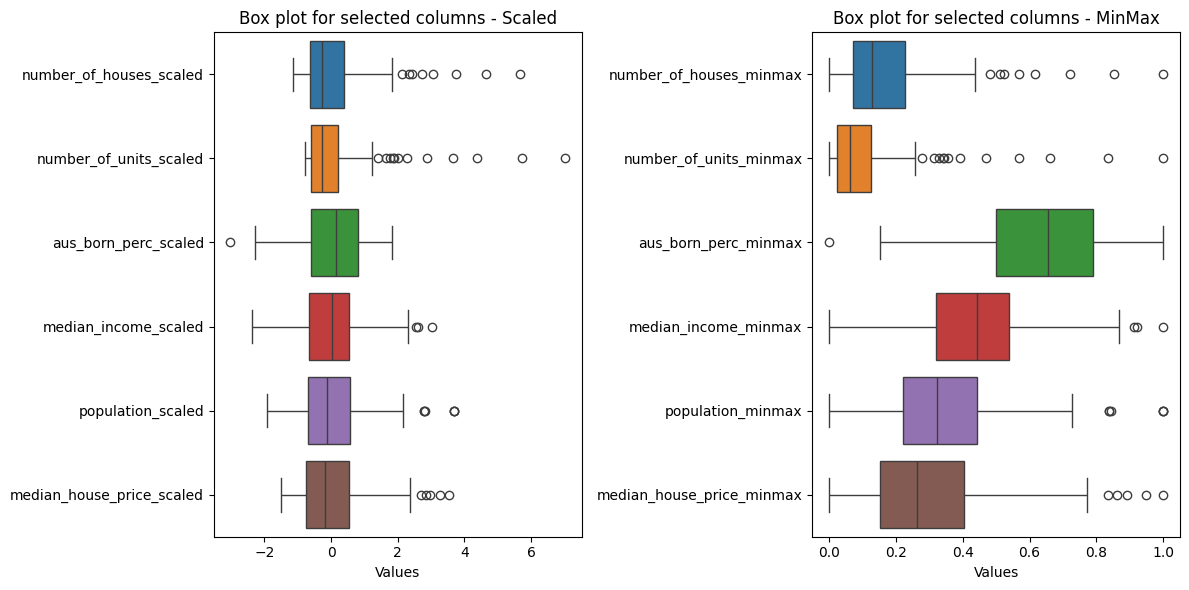

Count of outliers for each column: Z-score
number_of_houses_scaled       8
number_of_units_scaled       12
aus_born_perc_scaled          1
median_income_scaled          3
population_scaled             6
median_house_price_scaled     5
dtype: int64
Count of outliers for each column: MinMax
number_of_houses_minmax       8
number_of_units_minmax       12
aus_born_perc_minmax          1
median_income_minmax          3
population_minmax             6
median_house_price_minmax     5
dtype: int64


In [ ]:
selected_columns1 = ['number_of_houses_scaled', 'number_of_units_scaled', 'aus_born_perc_scaled', 'median_income_scaled', 'population_scaled', 'median_house_price_scaled']
selected_columns2 = ['number_of_houses_minmax', 'number_of_units_minmax', 'aus_born_perc_minmax', 'median_income_minmax', 'population_minmax', 'median_house_price_minmax']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(data=suburb_info[selected_columns1], orient="h", ax=axes[0])
axes[0].set_xlabel("Values")
axes[0].set_title("Box plot for selected columns - Scaled")

sns.boxplot(data=suburb_info[selected_columns2], orient="h", ax=axes[1])
axes[1].set_xlabel("Values")
axes[1].set_title("Box plot for selected columns - MinMax")

plt.tight_layout()
plt.show()

Q1 = suburb_info[selected_columns1].quantile(0.25)
Q3 = suburb_info[selected_columns1].quantile(0.75)
IQR = Q3 - Q1
outliers = ((suburb_info[selected_columns1] < (Q1 - 1.5 * IQR)) | (suburb_info[selected_columns1] > (Q3 + 1.5 * IQR)))

# Count outliers for each column
outlier_counts = outliers.sum()
print("Count of outliers for each column: Z-score")
print(outlier_counts)

Q11 = suburb_info[selected_columns2].quantile(0.25)
Q33 = suburb_info[selected_columns2].quantile(0.75)
IQRR = Q33 - Q11
outlier = ((suburb_info[selected_columns2] < (Q11 - 1.5 * IQRR)) | (suburb_info[selected_columns2] > (Q33 + 1.5 * IQRR)))

# Count outliers for each column
outlier_count = outlier.sum()
print("Count of outliers for each column: MinMax")
print(outlier_count)

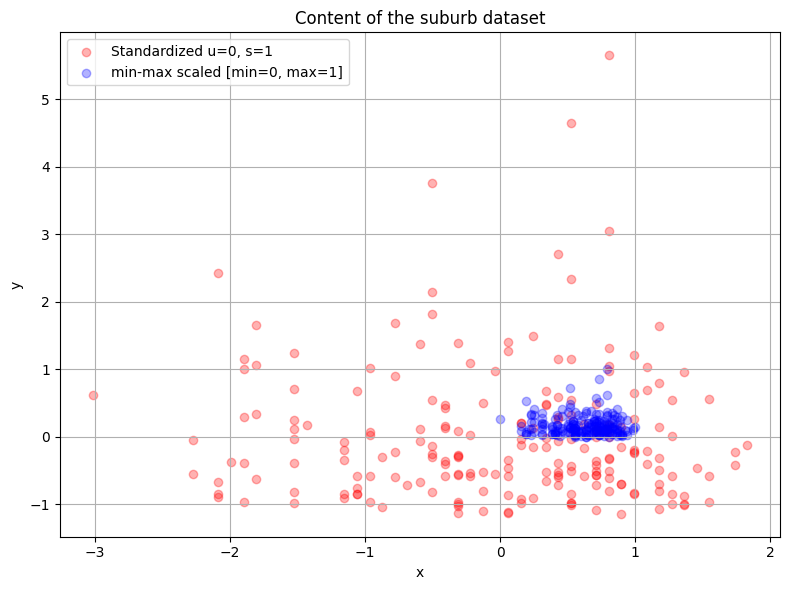

In [ ]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(std[:,2], std[:,3], color='red',
             label='Standardized u=0, s=1', alpha=0.3)

    plt.scatter(data_minmax[:,2], data_minmax[:,3],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Content of the suburb dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

Z-score standardization is robust to outliers beacuse it relies on the mean and standardization of the data, which are less sensitive to outliers compared to the range used in the minmax scaling. it maintains the shape of the distribution.

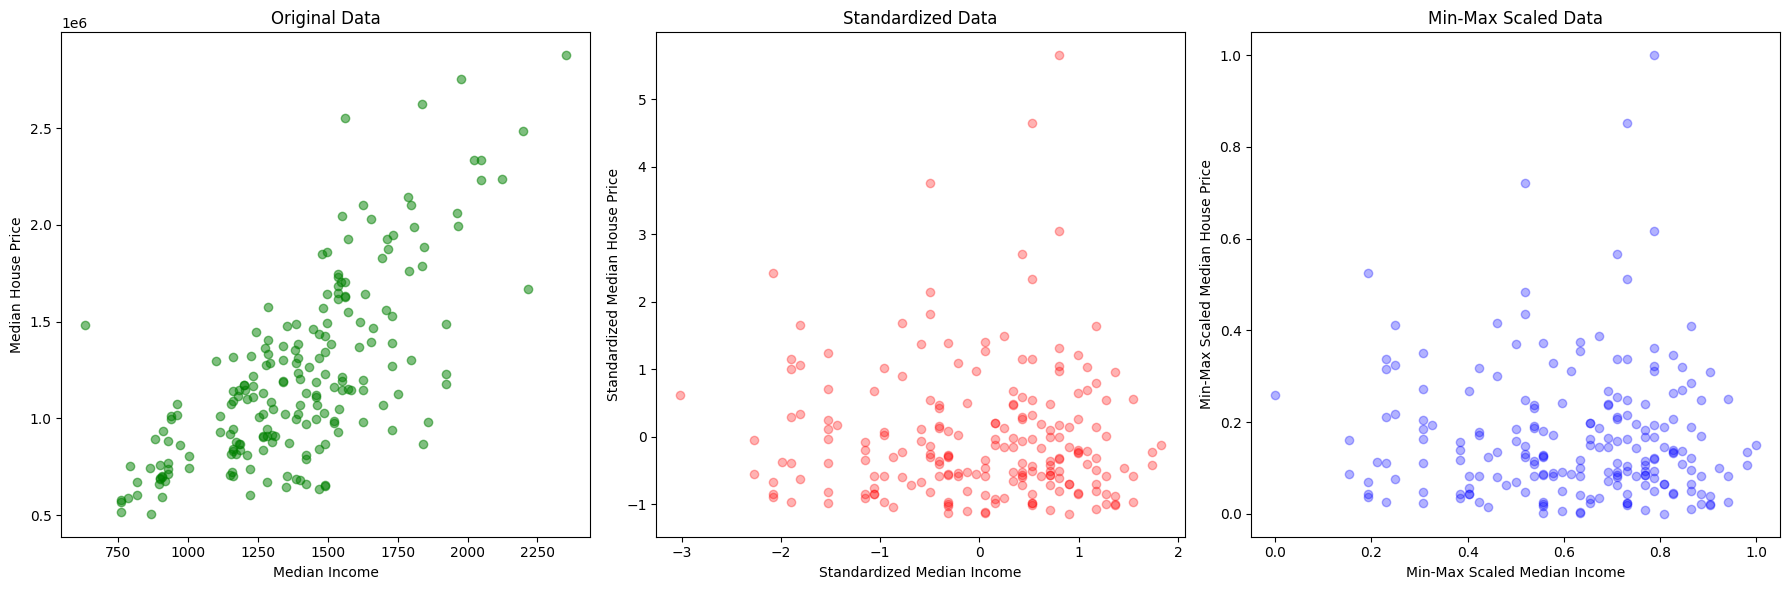

In [ ]:
import matplotlib.pyplot as plt

def plot():
    f, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].scatter(suburb_info['median_income'], suburb_info['median_house_price'],
                   color='green', label='input scale', alpha=0.5)
    axs[0].set_title('Original Data')
    axs[0].set_xlabel('Median Income')
    axs[0].set_ylabel('Median House Price')

    axs[1].scatter(std[:, 2], std[:, 3], color='red',
                   label='Standardized u=0, s=1', alpha=0.3)
    axs[1].set_title('Standardized Data')
    axs[1].set_xlabel('Standardized Median Income')
    axs[1].set_ylabel('Standardized Median House Price')

    axs[2].scatter(data_minmax[:, 2], data_minmax[:, 3],
                   color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)
    axs[2].set_title('Min-Max Scaled Data')
    axs[2].set_xlabel('Min-Max Scaled Median Income')
    axs[2].set_ylabel('Min-Max Scaled Median House Price')

    plt.tight_layout()

plot()
plt.show()


#**Transformations:**

In [ ]:
suburb_info.head()

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population,median_income_scaled,median_house_price_scaled,aus_born_perc_scaled,number_of_houses_scaled,number_of_units_scaled,population_scaled,median_income_minmax,median_house_price_minmax,aus_born_perc_minmax,number_of_houses_minmax,number_of_units_minmax,population_minmax
0,ABBOTSFORD,2304,4706,Yarra,68.0,1797.0,1299400.0,4025,1.290206,0.171267,-0.034127,-0.545852,0.712207,-1.527529,0.677138,0.334459,0.615385,0.087660,0.191036,0.071608
1,ABERFELDIE,1410,453,Moonee Valley,81.0,1571.0,1926600.0,22442,0.577392,1.504284,1.176908,-0.809379,-0.648788,0.394837,0.545666,0.599257,0.865385,0.048883,0.016160,0.413709
2,ALBANVALE,1897,138,Brimbank,46.0,907.0,594200.0,54005,-1.516891,-1.327527,-2.083570,-0.665824,-0.749590,3.689381,0.159395,0.036731,0.192308,0.070007,0.003207,1.000000
3,ALBION,1389,1392,Brimbank,52.0,929.0,739100.0,30677,-1.447502,-1.019564,-1.524631,-0.815569,-0.348300,1.254406,0.172193,0.097906,0.307692,0.047972,0.054770,0.566676
4,ALPHINGTON,1729,1099,Darebin,73.0,1538.0,1729600.0,9227,0.473309,1.085591,0.431656,-0.715346,-0.442063,-0.984544,0.526469,0.516085,0.711538,0.062720,0.042722,0.168236


As number_of_houses, number_of_units, population represent counts and exhibit a wide range of values and having much karger values compared to "aus_born_perc". such differences in scales can affect the performance of linear models. features with larger scales might affect the model, As these columns have a positive skew distribution, therfore transformation is required to stabalize the variance and make the distribution more symmetric. Lets us try to study the affects of different transformation methods on these columns.

In [ ]:
#Root Transformation
suburb_info['sqrt_number_of_houses'] = suburb_info['number_of_houses'].apply(np.sqrt)
suburb_info['sqrt_number_of_units'] = suburb_info['number_of_units'].apply(np.sqrt)
suburb_info['sqrt_population'] = suburb_info['population'].apply(np.sqrt)

In [ ]:
#Square Power Transformation
suburb_info['squared_number_of_houses'] = suburb_info['number_of_houses'] ** 2
suburb_info['squared_number_of_units'] = suburb_info['number_of_units'] ** 2
suburb_info['squared_population'] = suburb_info['population'] ** 2

In [ ]:
import math
#Log Transformation
suburb_info['log_number_of_houses'] = suburb_info['number_of_houses'].apply(lambda x: math.log(x + 1))
suburb_info['log_number_of_units'] = suburb_info['number_of_units'].apply(lambda x: math.log(x + 1))
suburb_info['log_population'] = suburb_info['population'].apply(lambda x: math.log(x + 1))

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for the specified columns
suburb_info = remove_outliers(suburb_info, 'number_of_houses_minmax')
suburb_info = remove_outliers(suburb_info, 'number_of_units_minmax')
suburb_info = remove_outliers(suburb_info, 'population_minmax')

In [ ]:
from scipy.stats import boxcox
#Box-Cox Transformation
suburb_info['boxcox_number_of_houses'], _ = boxcox(suburb_info['number_of_houses'])
suburb_info['boxcox_number_of_units'], _ = boxcox(suburb_info['number_of_units'] + 1)
suburb_info['boxcox_population'], _ = boxcox(suburb_info['population'])

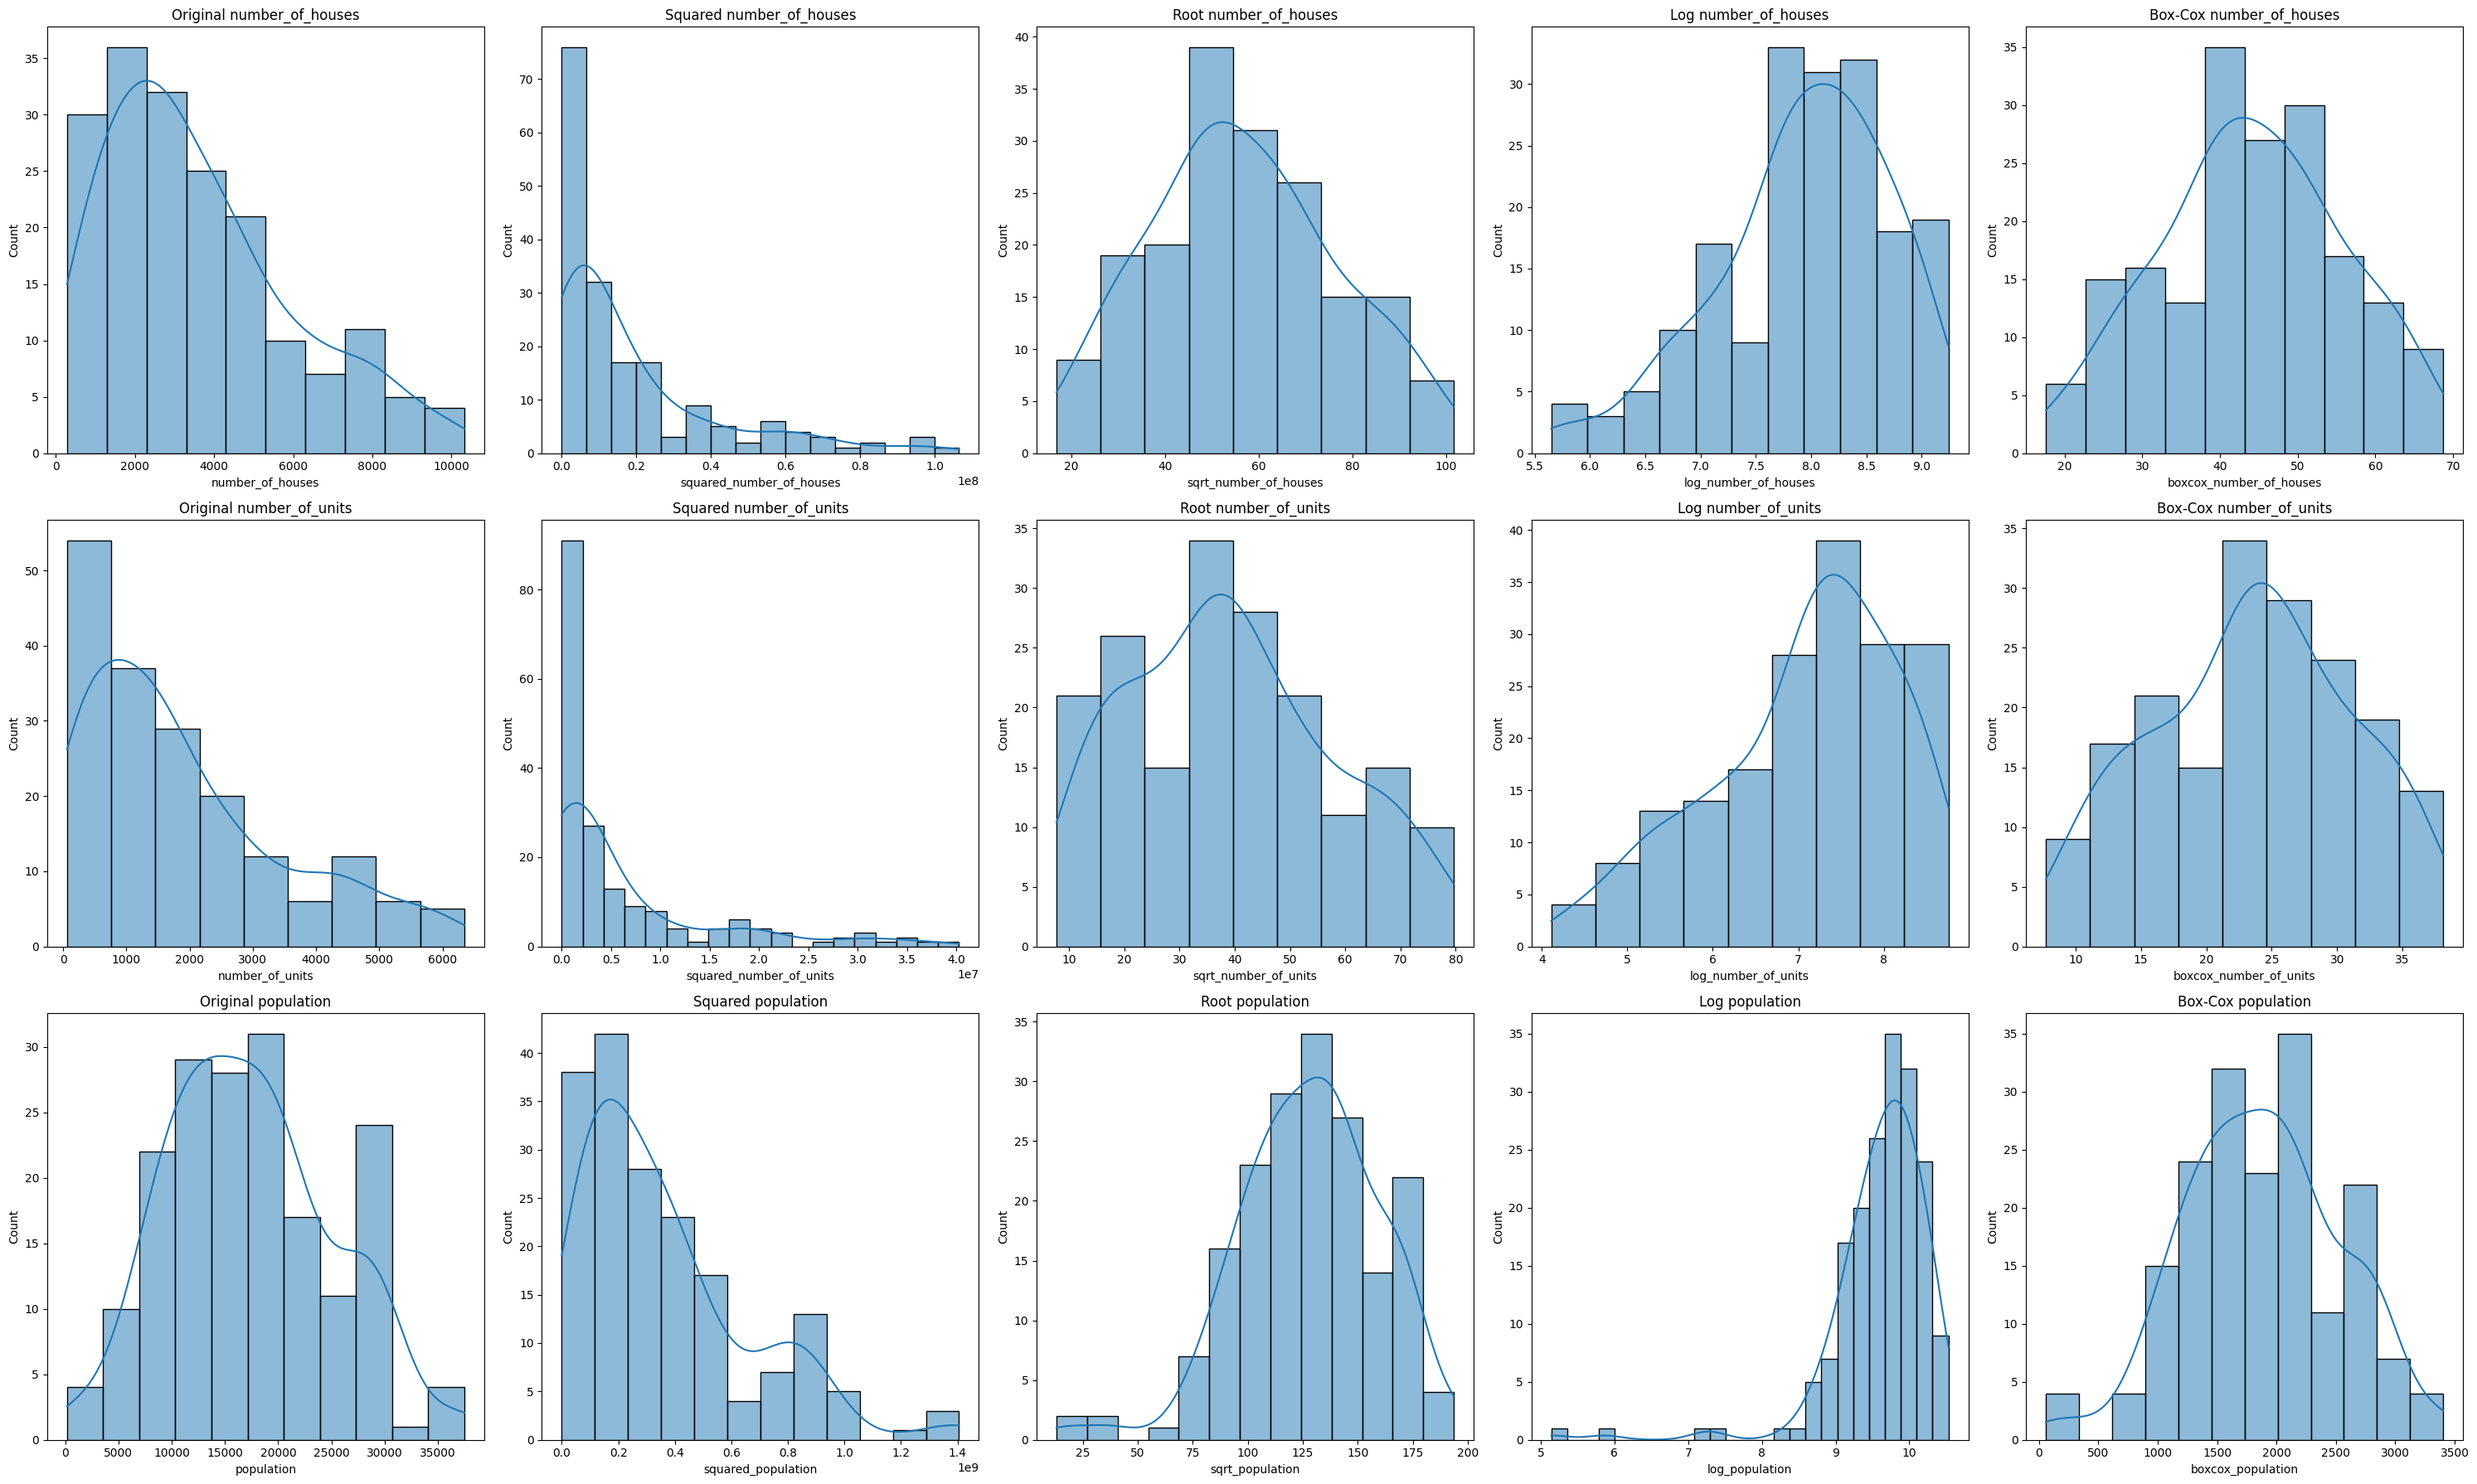

In [ ]:
plt.figure(figsize=(30, 18))

# Plot the distributions horizontally

# Original distributions
plt.subplot(3, 5, 1)
sns.histplot(suburb_info['number_of_houses'], kde=True)
plt.title('Original number_of_houses')

plt.subplot(3, 5, 6)
sns.histplot(suburb_info['number_of_units'], kde=True)
plt.title('Original number_of_units')

plt.subplot(3, 5, 11)
sns.histplot(suburb_info['population'], kde=True)
plt.title('Original population')

# Square Power Transformed distributions
plt.subplot(3, 5, 2)
sns.histplot(suburb_info['squared_number_of_houses'], kde=True)
plt.title('Squared number_of_houses')

plt.subplot(3, 5, 7)
sns.histplot(suburb_info['squared_number_of_units'], kde=True)
plt.title('Squared number_of_units')

plt.subplot(3, 5, 12)
sns.histplot(suburb_info['squared_population'], kde=True)
plt.title('Squared population')

# Root Transformed distributions
plt.subplot(3, 5, 3)
sns.histplot(suburb_info['sqrt_number_of_houses'], kde=True)
plt.title('Root number_of_houses')

plt.subplot(3, 5, 8)
sns.histplot(suburb_info['sqrt_number_of_units'], kde=True)
plt.title('Root number_of_units')

plt.subplot(3, 5, 13)
sns.histplot(suburb_info['sqrt_population'], kde=True)
plt.title('Root population')

# Log Transformed distributions
plt.subplot(3, 5, 4)
sns.histplot(suburb_info['log_number_of_houses'], kde=True)
plt.title('Log number_of_houses')

plt.subplot(3, 5, 9)
sns.histplot(suburb_info['log_number_of_units'], kde=True)
plt.title('Log number_of_units')

plt.subplot(3, 5, 14)
sns.histplot(suburb_info['log_population'], kde=True)
plt.title('Log population')

# Box-Cox Transformed distributions
plt.subplot(3, 5, 5)
sns.histplot(suburb_info['boxcox_number_of_houses'], kde=True)
plt.title('Box-Cox number_of_houses')

plt.subplot(3, 5, 10)
sns.histplot(suburb_info['boxcox_number_of_units'], kde=True)
plt.title('Box-Cox number_of_units')

plt.subplot(3, 5, 15)
sns.histplot(suburb_info['boxcox_population'], kde=True)
plt.title('Box-Cox population')

plt.tight_layout()
plt.show()

* For squared transformations, we can see that the transformation produces a
large positive skew. This large skew would make it an unsuitable option when building the linear regression model
* The same can be said for root transformation. As we can see from feature number_of_houses and number_of_units, there is also a large positive skew which can create bias within the model
* For log transformation, we can see a large negative skew in the population feature, making this transformation not suitable
* The transformation that performs the changes as we like is the box-cox transformation as it makes the distribution of the dataset most resemble a normal distribution, stabilising the variance and normalising the skewed data. This improves the performance and accuracy of the linear regression model when constructed.